<a href="https://colab.research.google.com/github/tina287/fianceHomework/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9AHW_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 取得股價資料

In [ ]:
import numpy as np # 數值計算套件
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt # 畫圖套件
from sklearn.metrics import mean_squared_error # 計算 mse 誤差

In [ ]:
# 輸入股票代號
stock_id = '2330.tw'
# stock_id = '2357.tw'
# stock_id = '2317.tw'
# stock_id = 'AAPL'
# stock_id = 'NVDA'

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2020, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 10, 10)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位轉為datetime格式
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
# 將日期欄位設為索引
stock_data.set_index("Date", inplace=True)

# 刪除 Ticker 欄位並取代
stock_data.columns = stock_data.columns.droplevel('Ticker')

stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-26,788.0,789.0,782.0,782.0,775.530762,32571247
2024-04-29,790.0,795.0,787.0,795.0,788.423218,26765837
2024-04-30,797.0,802.0,790.0,790.0,783.464539,39051972
2024-05-02,789.0,789.0,772.0,772.0,765.613403,40527228
2024-05-03,788.0,788.0,773.0,780.0,773.547302,29901556
...,...,...,...,...,...,...
2024-10-15,1050.0,1075.0,1050.0,1070.0,1070.000000,42850176
2024-10-16,1040.0,1070.0,1035.0,1045.0,1045.000000,52652149
2024-10-17,1050.0,1055.0,1030.0,1035.0,1035.000000,54173771


In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


# <b>1. 可視化 K 線</b>

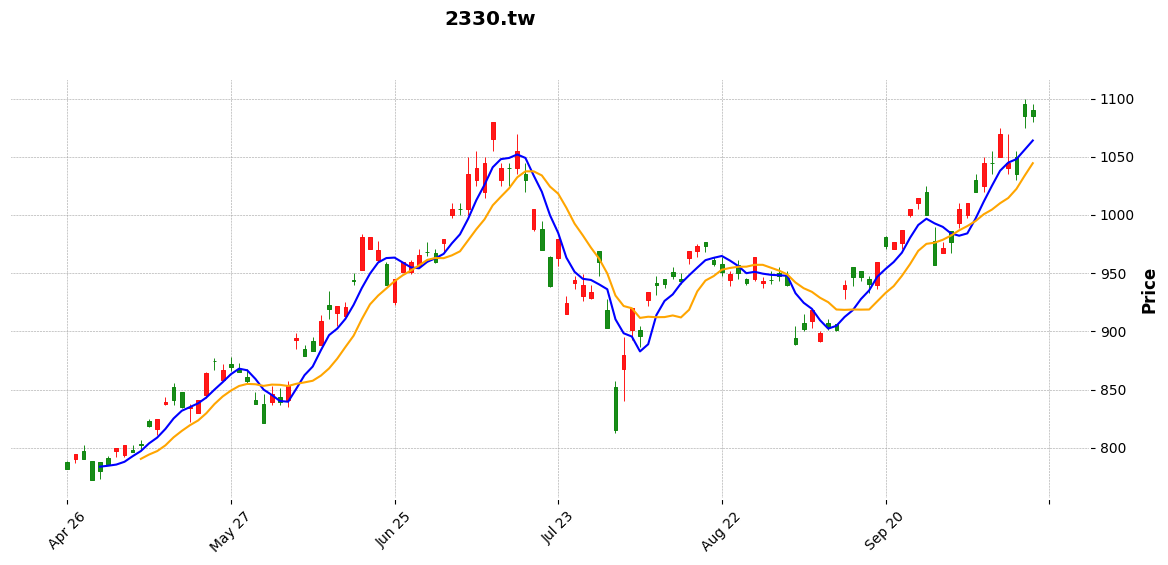

In [ ]:
import mplfinance as mpf

# 設置 K 線繪圖風格，漲為紅色，跌為綠色
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=my_color)

# 計算 5 日和 10 日均線
stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['MA10'] = stock_data['Close'].rolling(window=10).mean()

# 設定兩條均線的顏色
add_plots = [
    mpf.make_addplot(stock_data['MA5'], color='blue', width=1.5),
    mpf.make_addplot(stock_data['MA10'], color='orange', width=1.5)
]

# 繪製 K 線圖並添加均線
mpf.plot(stock_data,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         addplot=add_plots)

# 保存帶有不同顏色均線的 K 線圖
mpf.plot(stock_data,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         addplot=add_plots,
         savefig='k_line_with_colored_ma.png')

# <b>2. 資料前處理</b>

In [ ]:
# 輸入股票代號
stock_id = '2330.tw'

# 抓取特定時間
start = dt.datetime(2006, 1, 1)  # 指定的開始日期
end = dt.datetime(2024, 10, 10)    # 指定的結束日期

# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位轉為datetime格式
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
# 將日期欄位設為索引
stock_data.set_index('Date', inplace=True)
# 刪除 Ticker 欄位並取代
stock_data.columns = stock_data.columns.droplevel('Ticker')
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-02,59.106514,59.106514,57.384964,58.341381,30.093084,30366490
2006-01-03,58.341381,60.158569,57.863174,60.158569,31.030403,71325650
2006-01-04,60.349854,60.636780,59.297798,60.636780,31.277079,55262558
2006-01-05,60.636780,61.210629,59.871647,61.210629,31.573072,44492141
2006-01-06,61.975761,62.645252,61.880119,62.645252,32.313068,68933386
...,...,...,...,...,...,...
2024-10-01,967.000000,977.000000,967.000000,972.000000,972.000000,26760355
2024-10-04,986.000000,986.000000,967.000000,977.000000,977.000000,40934818
2024-10-07,993.000000,1010.000000,989.000000,1005.000000,1005.000000,39667071


## <b>2.1. 擷取與標記</b>

In [ ]:
from PIL import Image # 處理圖像資料
import random # 隨機
import os # 系統檔，讀取資料使用
import mplfinance as mpf

window_size = 30  # K線圖的時間窗口

# 定義短期和長期均線的週期
short_window = 5  # 短期均線
long_window = 20  # 長期均線

# K線圖保存的文件夹
output_dir = 'k_line_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 儲存標籤
labels = []
file_names = []

# 片利數據並生成標籤和 K 線圖
for i in range(len(stock_data) - window_size):
    window_data = stock_data.iloc[i:i + window_size]  # 當前 K 線圖窗口

    # 計算短期均線和長期均線
    short_ma = window_data['Close'].rolling(window=short_window).mean().iloc[-1]
    long_ma = window_data['Close'].rolling(window=long_window).mean().iloc[-1]

    print(f'窗口{i}的短期均線: {short_ma}, 長期均線: {long_ma}, 標記為', end='')

    # 判斷漲跌：短期均線高於長期均縣則標記為漲，否則標記為跌
    if short_ma > long_ma:
        labels.append(1)  # 漲
        print('「漲」: 1')
    else:
        labels.append(0)  # 跌
        print('「跌」: 0')

    print('\n--------------------------------\n')

    # 生成文件名
    file_name = f'k_line_{i}.png'
    file_names.append(file_name)

    # 保存 K 線圖
    mpf.plot(window_data, type='candle', style=my_style, axisoff=True,
             figsize=(15, 6), savefig=os.path.join(output_dir, file_name))

# 保存標籤到 CSV 文件中
labels_df = pd.DataFrame({
    'file_name': file_names,
    'label': labels
})

labels_df.to_csv('labels.csv', index=False)

窗口0的短期均線: 59.37431030273437, 長期均線: 60.168135452270505, 標記為「跌」: 0

--------------------------------

窗口1的短期均線: 59.33605422973633, 長期均線: 60.082058143615725, 標記為「跌」: 0

--------------------------------

窗口2的短期均線: 59.45082397460938, 長期均線: 59.952942085266116, 標記為「跌」: 0

--------------------------------

窗口3的短期均線: 59.144770812988284, 長期均線: 59.91468544006348, 標記為「跌」: 0

--------------------------------

窗口4的短期均線: 59.01087265014648, 長期均線: 59.86686458587646, 標記為「跌」: 0

--------------------------------

窗口5的短期均線: 58.66656265258789, 長期均線: 59.79035129547119, 標記為「跌」: 0

--------------------------------

窗口6的短期均線: 58.34138107299805, 長期均線: 59.723402214050296, 標記為「跌」: 0

--------------------------------

窗口7的短期均線: 58.494407653808594, 長期均線: 59.76165885925293, 標記為「跌」: 0

--------------------------------

窗口8的短期均線: 58.68569107055664, 長期均線: 59.680363464355466, 標記為「跌」: 0

--------------------------------

窗口9的短期均線: 58.66656265258789, 長期均線: 59.56081142425537, 標記為「跌」: 0

--------------------------------

窗口1

In [ ]:
# 顯示漲跌數據筆數
labels_df['label'].value_counts()

label
1    2650
0    1921
Name: count, dtype: int64

## 2.2. 顯示可是化結果

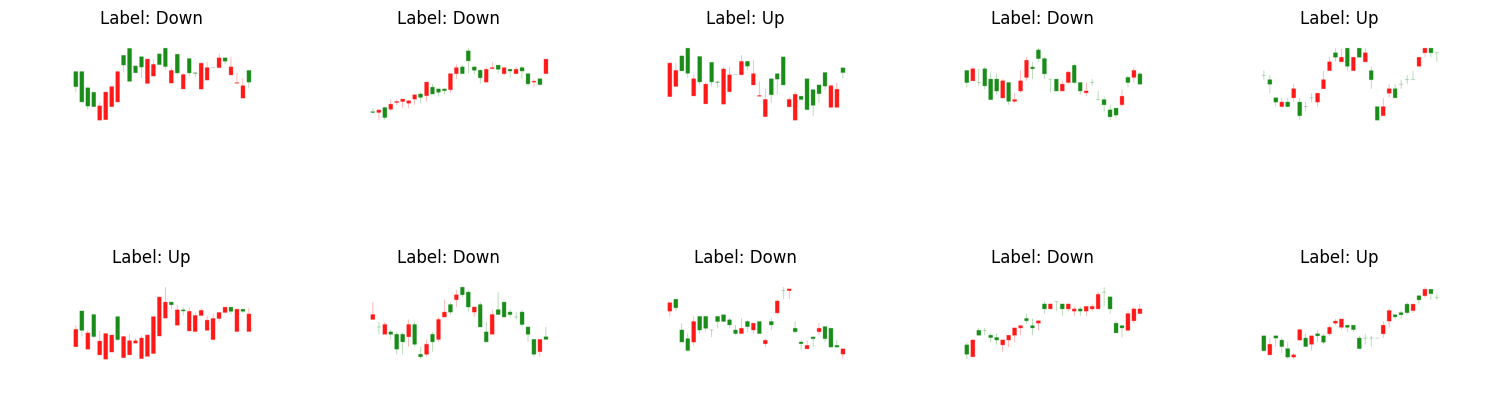

In [ ]:
# 載入 CSV label檔案
output_dir = 'k_line_images'
labels_df = pd.read_csv('labels.csv', dtype={'label': str})

# 隨機選10張圖
random_indices = random.sample(range(len(labels_df)), 10)
selected_images = labels_df.iloc[random_indices]

# 設定 2*5 畫布
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# 將圖放進畫布中
for i, (index, row) in enumerate(selected_images.iterrows()):
    img_path = os.path.join(output_dir, row['file_name'])
    img = Image.open(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {'Up' if row['label'] == '1' else 'Down'}")

plt.tight_layout()
plt.show()

# <b>3. 深度學習 CNN</b>

## <b>3.1. 切分訓練、驗證、測試集</b>

In [ ]:
# 用於資料集拆分訓練、驗證、測試
from sklearn.model_selection import train_test_split

# 先從原始資料中切分出測試集 (20%)
train_df, test_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['label'], random_state=42)

# 然後再把訓練集劃分成訓練集與驗證集 (80% 訓練，20% 驗證)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# K線圖位置路徑
image_dir = 'k_line_images/'

# 建立資料集生成器
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,     # 隨機選轉
    width_shift_range=0.1,  # 水平平移
    height_shift_range=0.1, # 垂直平移
    zoom_range=0.1,         # 隨機縮放
    horizontal_flip=True,   # 水平翻轉
    validation_split=0.2)   # 20% 當驗證集

In [ ]:
# 訓練集生成器
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 驗證集生成器
validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 測試集生成器（注意這裡不進行資料增強）
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary',
    shuffle=False  # 測試集不需要隨機打亂
)

Found 2924 validated image filenames belonging to 2 classes.
Found 732 validated image filenames belonging to 2 classes.
Found 915 validated image filenames belonging to 2 classes.


## <b>3.2. 建立 CNN 模型</b>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # 模型容器
from tensorflow.keras.layers import (
    Input, # 輸入層
    Conv2D,  # 卷積層
    MaxPooling2D, # 最大池化層
    Flatten, # 展平層
    Dense, # 全連接層
    LeakyReLU, # 避免梯度消失
    Dropout, # 避免過擬合
    BatchNormalization # 批次正規化
)
from tensorflow.keras.optimizers import Adam # 模型優化器
from tensorflow.keras.callbacks import ReduceLROnPlateau # 動態調整學習率

# 設定學習率動態調整
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# 建立模型容器
model = Sequential()

model.add(Input(shape=(150, 150, 3)))

# 第一層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(32, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第二層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第三層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 加入 Dropout 層來防止過擬合
model.add(Dropout(0.2))

# 展平層
model.add(Flatten())

# 全連接層 + LeakyReLU
model.add(Dense(128))
# 加入 Dropout 層
model.add(Dropout(0.2))

model.add(Dense(64))
# 加入 Dropout 層
model.add(Dropout(0.2))

# 輸出層（使用 sigmoid 進行二元分類）
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## <b>3.3. 訓練模型</b>

In [ ]:
# 模型訓練
hist = model.fit(
    train_generator,  # 訓練集生成器
    validation_data=validation_generator,  # 驗證集生成器
    epochs=30,  # 訓練週期
    callbacks=[reduce_lr]  # 使用動態調整學習率的回调函數
)

Epoch 1/30
366/366 [==============================] - 74s 195ms/step - loss: 4.6653 - accuracy: 0.6313 - val_loss: 0.6268 - val_accuracy: 0.7022 - lr: 0.0010
Epoch 2/30
366/366 [==============================] - 53s 145ms/step - loss: 1.3715 - accuracy: 0.6495 - val_loss: 0.5764 - val_accuracy: 0.7473 - lr: 0.0010
Epoch 3/30
366/366 [==============================] - 54s 147ms/step - loss: 0.8114 - accuracy: 0.6912 - val_loss: 0.5388 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/30
366/366 [==============================] - 54s 146ms/step - loss: 0.6790 - accuracy: 0.7066 - val_loss: 1.8622 - val_accuracy: 0.4208 - lr: 0.0010
Epoch 5/30
366/366 [==============================] - 54s 146ms/step - loss: 0.6067 - accuracy: 0.7281 - val_loss: 0.5603 - val_accuracy: 0.7063 - lr: 0.0010
Epoch 6/30
366/366 [==============================] - 53s 146ms/step - loss: 0.5885 - accuracy: 0.7216 - val_loss: 0.5401 - val_accuracy: 0.7077 - lr: 0.0010
Epoch 7/30
366/366 [==============================] 

## <b>3.3. 評估結果</b>

In [ ]:
# 測試模型
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

115/115 [==============================] - 14s 123ms/step - loss: 0.3085 - accuracy: 0.8743
Test accuracy: 0.874316930770874


In [ ]:
# 獲取一批測試集圖片
test_images, test_labels = next(test_generator)
# 預測測試集
predictions = model.predict(test_images)

1/1 [==============================] - 0s 137ms/step


實際結果： 漲
預測結果： 漲


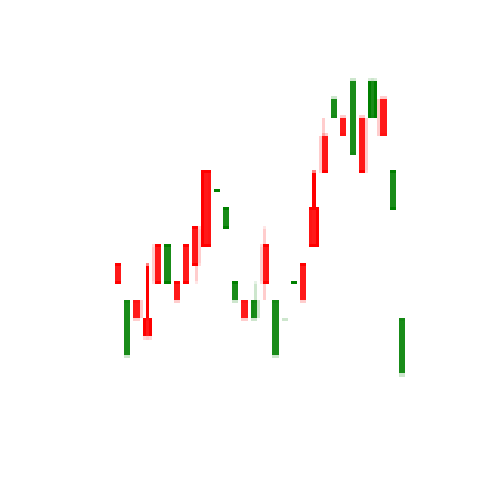

In [ ]:
print('實際結果：', '漲' if test_labels[0] == 1 else '跌') # 實際邊謙 0 為跌 1 為漲
print('預測結果：', '漲' if predictions[0] > 0.5 else '跌') # Sigmoid 0.5 為閾值

plt.figure(figsize=(15, 6))
plt.imshow(test_images[0])
plt.axis('off')
plt.show()

示範版本：https://colab.research.google.com/drive/1JU5moNn-dxUOe8ECd4kHpPtR-1kmISvL?usp=sharing

# 補充：滑動窗口範例

假設一週的溫度資料
```
星期一：25°C
星期二：26°C
星期三：27°C
星期四：28°C
星期五：29°C
星期六：30°C
星期日：31°C
```

滑動窗口示例：
* window_size = 3
* step_size = 1

```
第 1 個窗口： 星期一 - 星期三
窗口數據：25°C, 26°C, 27°C

第 2 個窗口： 星期二 - 星期四
窗口數據：26°C, 27°C, 28°C

第 3 個窗口： 星期三 - 星期五
窗口數據：27°C, 28°C, 29°C

第 4 個窗口： 星期四 - 星期六
窗口數據：28°C, 29°C, 30°C

第 5 個窗口： 星期五 - 星期日
窗口數據：29°C, 30°C, 31°C
```